House Sales Price Prediction using Keras Regression and Tenserflow backend

In this notebook,an attempt has been made to predict the price of a house using certain features by training a neural network with these features.

Steps followed for the same are: 
1.Exploring and Processing the Data
2Building and Training our Neural Network
3.Visualizing Loss and Accuracy
4.Evaluating our model on test data and obtaining the metrics for evaluation
5.Predicting the price of a sample house using the model

Dataset used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [143]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [144]:
Data = pd.read_csv(r"C:\Users\eshan\Downloads\kc_house_data.csv")

In [145]:
Data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


EXPLORATORY  DATA  ANALYSIS

In [146]:
Data.shape

(21613, 21)

In [147]:
# list of all attributes
Data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [148]:
# now we wont need features like id and zipcode for Exploratory Data Analysis and for our model hence we drop it for further use
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [149]:
Data.isnull().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

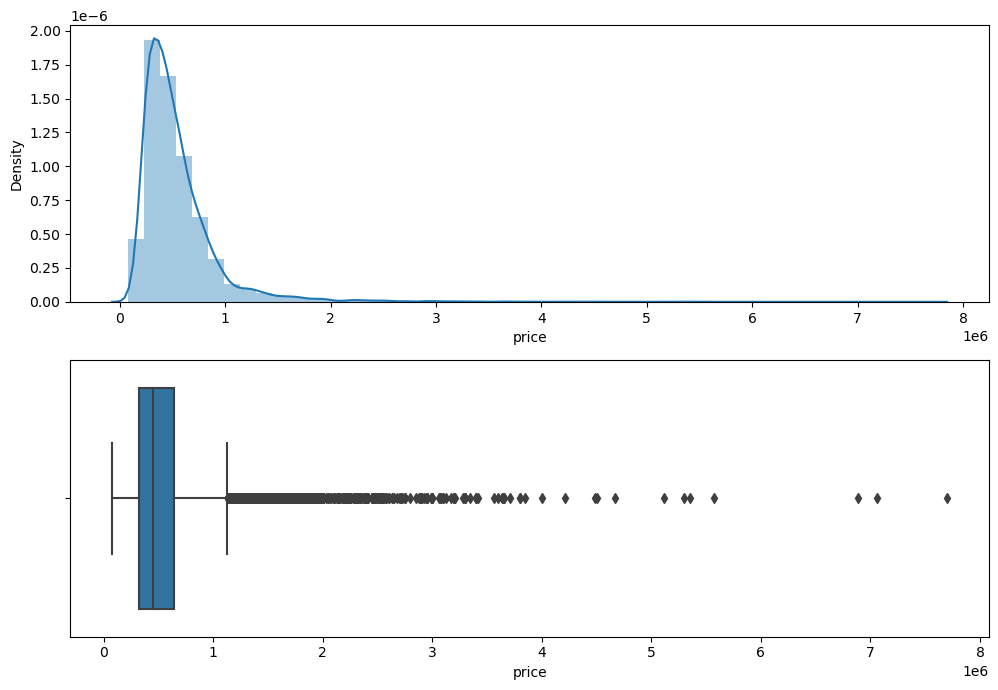

In [150]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()


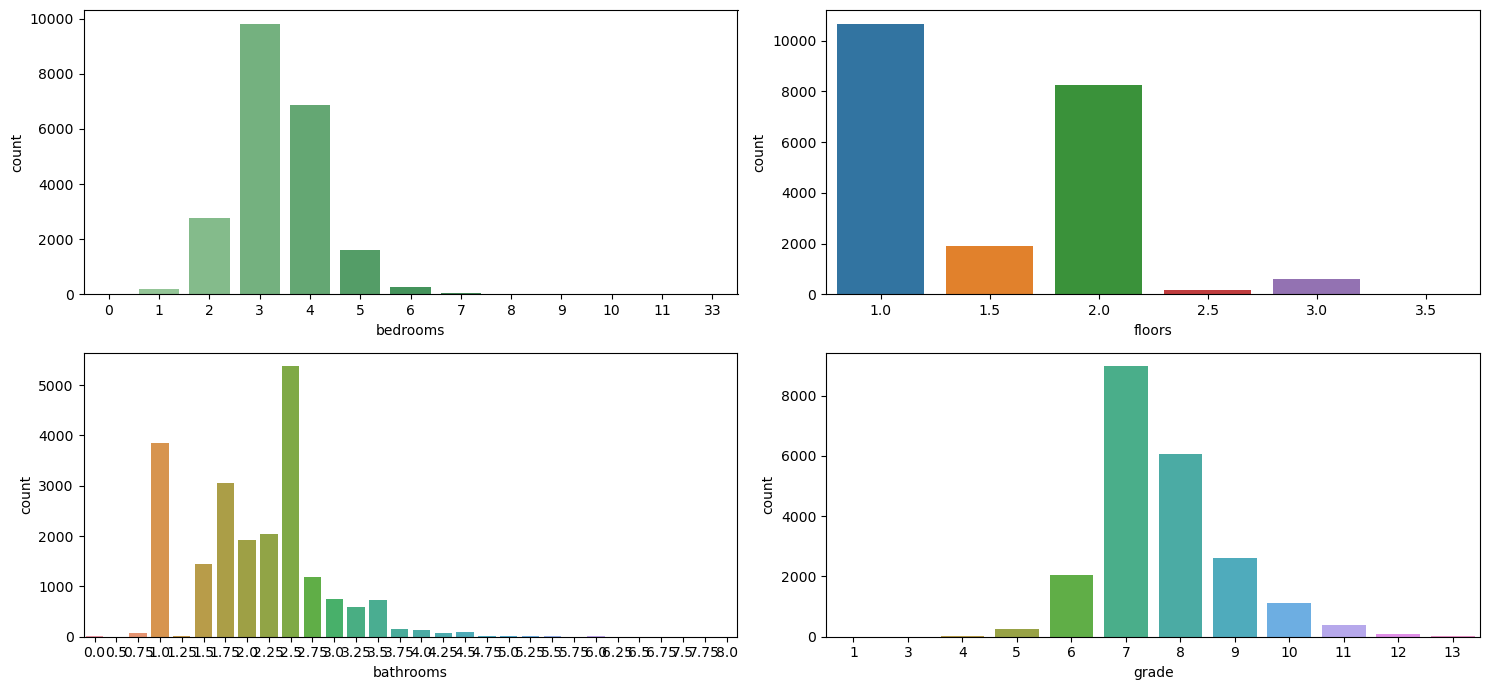

In [151]:
fig = plt.figure(figsize=(15,7),constrained_layout=True)
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'], palette = 'Greens_d')
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

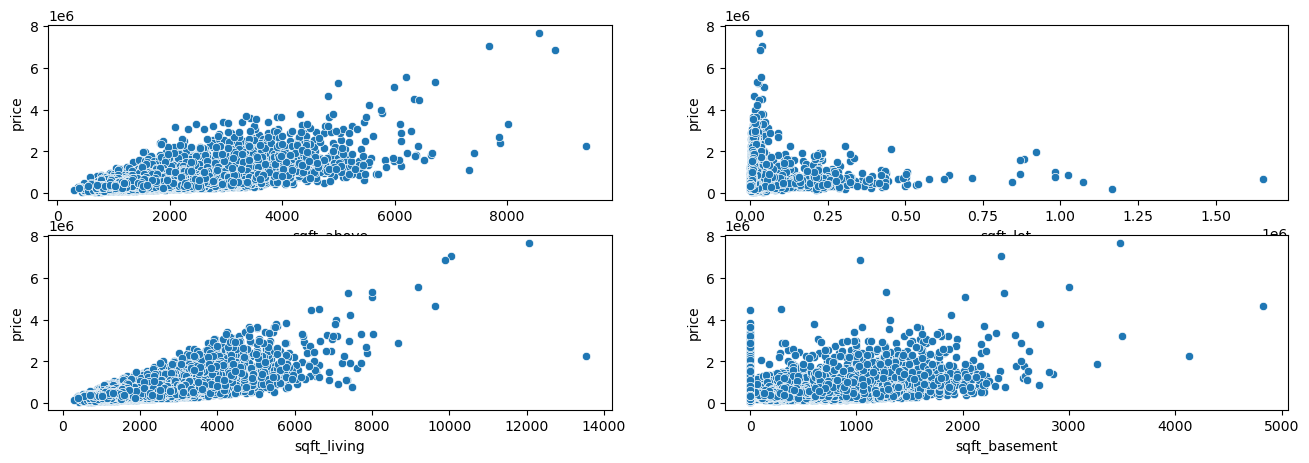

In [152]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

<AxesSubplot:>

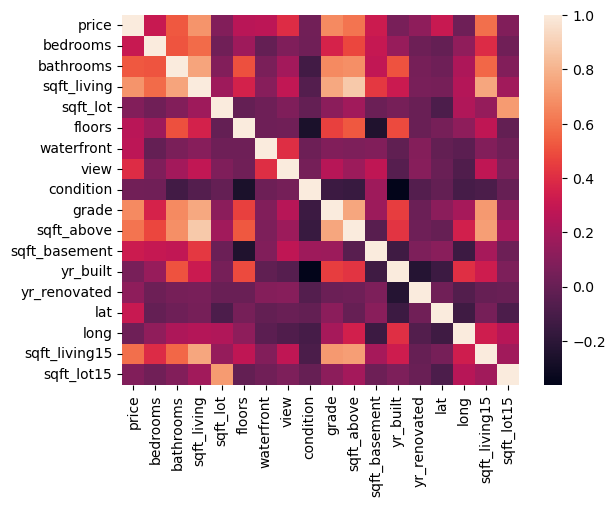

In [153]:
sns.heatmap(Data.corr())

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

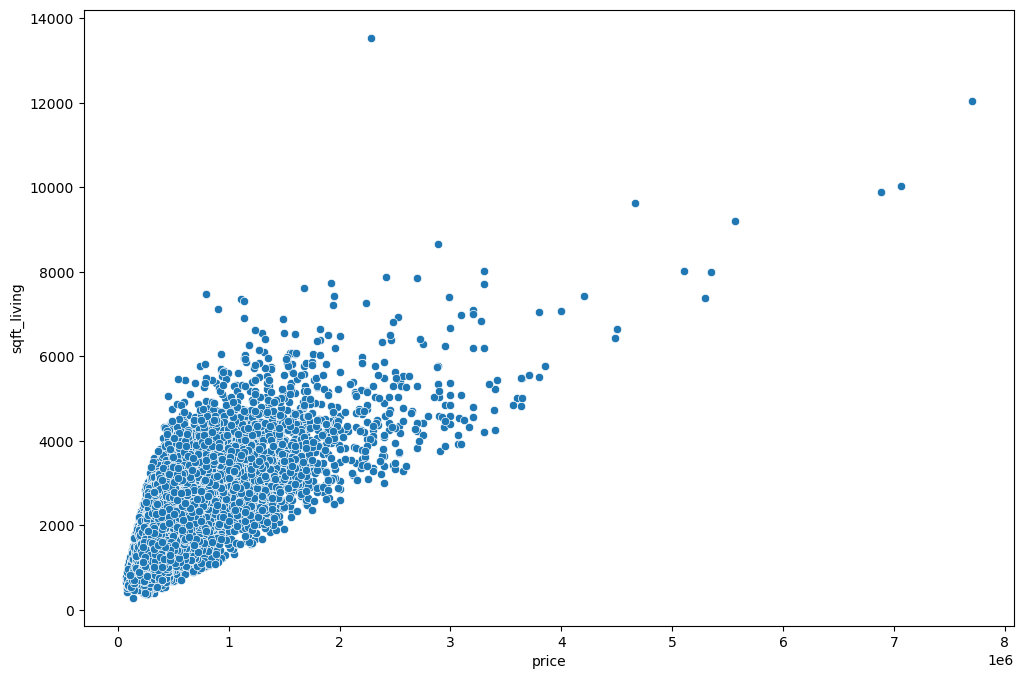

In [154]:
# from the above graph we can see that feature sqft_living has highest correlation with price which is quite obvious
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

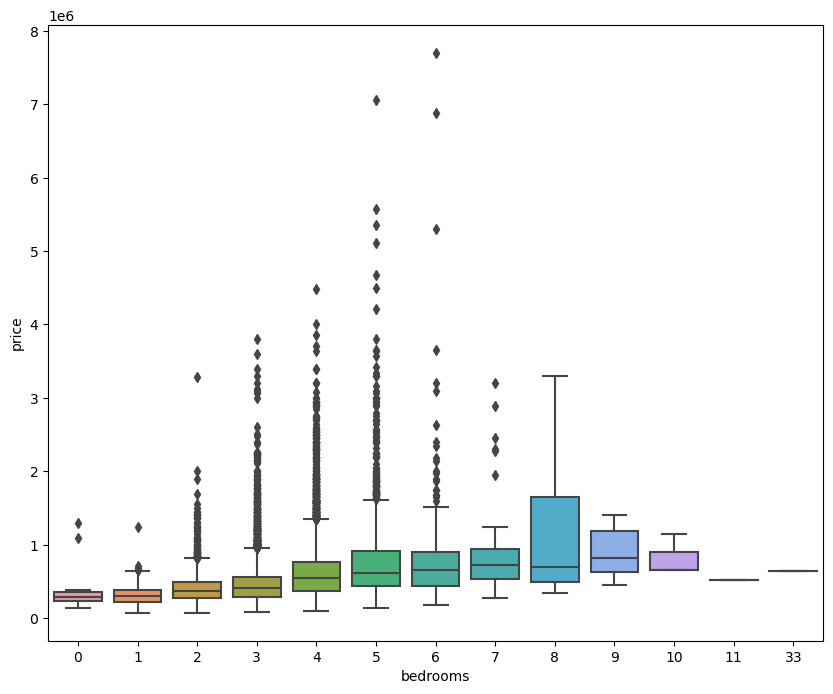

In [155]:
# next we consider a feature like number of bedrooms provided
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

In [156]:
#converting date column to standard date format
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)

<AxesSubplot:xlabel='year'>

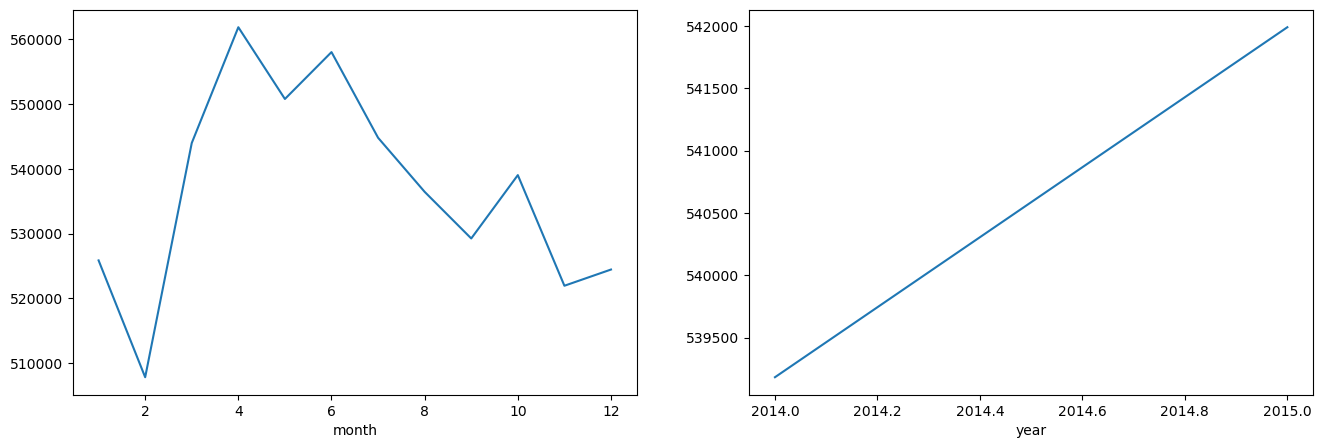

In [157]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

# from the graph we can see the prices are highest in the months of April,May and lowest in February
# and obviously prices are rising by each year and so is evident in the second graph




SPLITTING OUR DATASET INTO TRAIN AND TEST DATA




In [158]:
Data=Data.drop(['date'],axis =1)
#Y is independent variable and X consists of dependent variables used to predict Y
X = Data.drop(['price'],axis =1).values
y = Data['price'].values


#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


SCALING THE DATA

In [159]:
#scaling our training and testing data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

BUILDING AND TRAINING THE NEURAL NETWORK 

In [160]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [161]:
#model architecture
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [162]:
hist=model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
114/114 [==============================] - 0s 2ms/step - loss: 416594329600.0000 - val_loss: 446383030272.0000
Epoch 2/400
114/114 [==============================] - 0s 1ms/step - loss: 414904418304.0000 - val_loss: 439737876480.0000
Epoch 3/400
114/114 [==============================] - 0s 1ms/step - loss: 388020076544.0000 - val_loss: 372746387456.0000
Epoch 4/400
114/114 [==============================] - 0s 1ms/step - loss: 266428235776.0000 - val_loss: 185620381696.0000
Epoch 5/400
114/114 [==============================] - 0s 1ms/step - loss: 110611816448.0000 - val_loss: 92646137856.0000
Epoch 6/400
114/114 [==============================] - 0s 1ms/step - loss: 73671229440.0000 - val_loss: 81414103040.0000
Epoch 7/400
114/114 [==============================] - 0s 1ms/step - loss: 65877495808.0000 - val_loss: 74774183936.0000
Epoch 8/400
114/114 [==============================] - 0s 1ms/step - loss: 60677668864.0000 - val_loss: 69794988032.0000
Epoch 9/400
114/114 [==

In [163]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 19)                380       
                                                                 
 dense_11 (Dense)            (None, 19)                380       
                                                                 
 dense_12 (Dense)            (None, 19)                380       
                                                                 
 dense_13 (Dense)            (None, 19)                380       
                                                                 
 dense_14 (Dense)            (None, 1)                 20        
                                                                 
Total params: 1,540
Trainable params: 1,540
Non-trainable params: 0
_________________________________________________________________


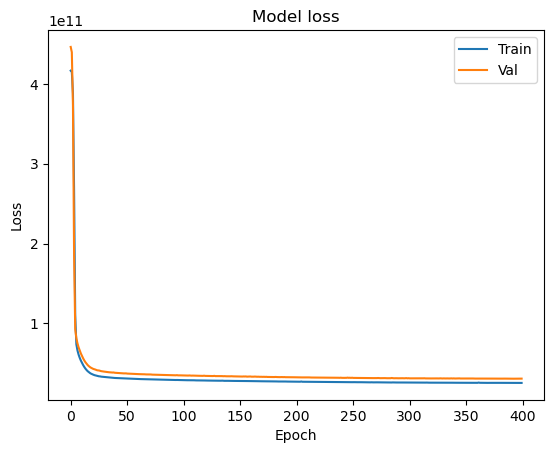

In [183]:
#model loss and validation losses
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

plt.show()


EVALUATION ON TEST DATA

In [166]:
# evaluating our model
y_pred = model.predict(X_test)

223/223 [==============================] - 0s 556us/step


In [167]:
#model evaluation
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))

Mean Absolute Error: 104173.10
Mean Squared Error: 30647686638.99
Root Mean Squared Error: 175064.81
Variance score is: 0.80


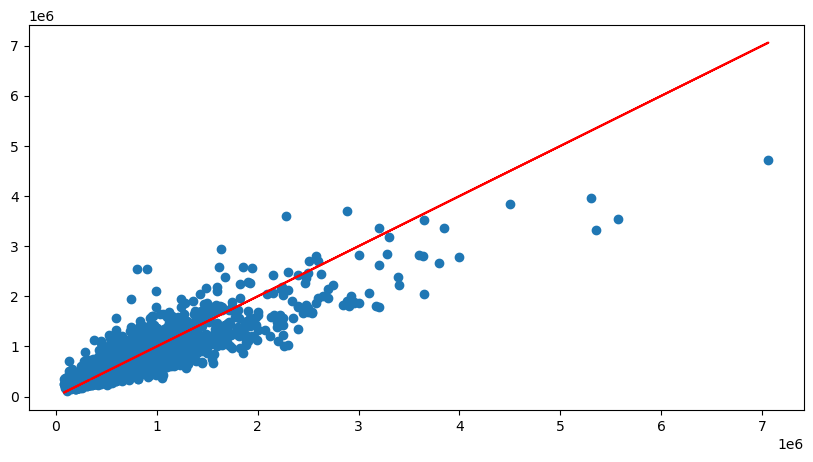

In [168]:
# Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [169]:
# using our model to predict the cost of a house in the database
single_house = Data.drop('price',axis = 1).iloc[0]

In [170]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [171]:
# predicting the value of the first house in the database using the trained model
model.predict(single_house)

1/1 [==============================] - 0s 12ms/step


array([[277182.84]], dtype=float32)

In [172]:
#actual price of the house
Data['price'][0]

221900.0